# **Customer Marketing & Purchase Behavior Analysis**  
## **Data-Driven Insights for Optimizing Campaigns & Sales Channels**  

### **Objective:**  
- Analyze customer responses to marketing campaigns, spending behavior, and purchase trends using Python to provide actionable business insights.

### **Credits & Data Source:**  
https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign


1️⃣ **Data Cleaning & Preparation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = pd.read_csv(r'marketing_campaign.csv', sep=';')

df = pd.DataFrame(file)

df.drop_duplicates()
df['income_group'] = pd.cut(df['Income'], bins=[0,30000,70000, float("inf")], labels=['Low', 'Medium', 'High'])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.columns = df.columns.str.lower()


2️⃣ **Exploratory Data Analysis (EDA) & Insights**

*Insight #1: Campaign Success Rate*
- 📌 Goal: Identify which campaign performed best.

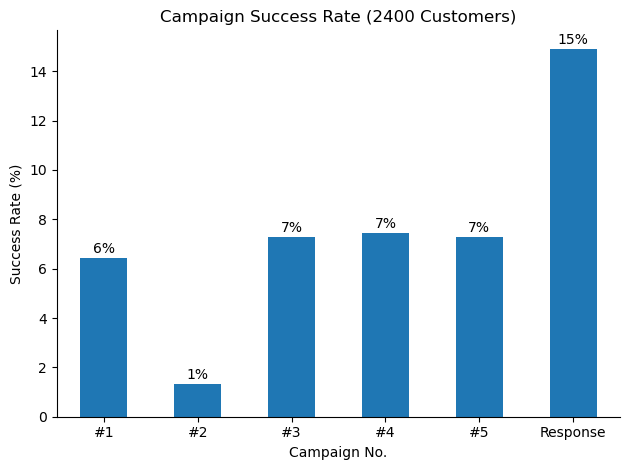

In [2]:
total_customers = len(df)
success_rate = df[['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'response']].sum().reset_index()
success_rate.columns = ['campaign', 'percent']
success_rate['percent'] = (success_rate['percent']/total_customers) * 100

new_labels_campaign = ['#1', '#2', '#3', '#4', '#5', 'Response',]
ax0 = success_rate.plot(kind='bar')
sns.despine()
for i, v in enumerate(success_rate['percent']):
    ax0.text(i, v + 0.2, f"{int(round(v))}%", ha='center')
ax0.set_xticks(range(len(new_labels_campaign)))
ax0.set_xticklabels(labels=new_labels_campaign, rotation=0 )
ax0.get_legend().remove()
plt.title('Campaign Success Rate (2400 Customers)')
plt.xlabel('Campaign No.')
plt.ylabel('Success Rate (%)')
plt.tight_layout()
plt.show()

*Insight #2: Spending Behavior by Income Group*
- 📌 Goal: See how different income groups spend on product categories.

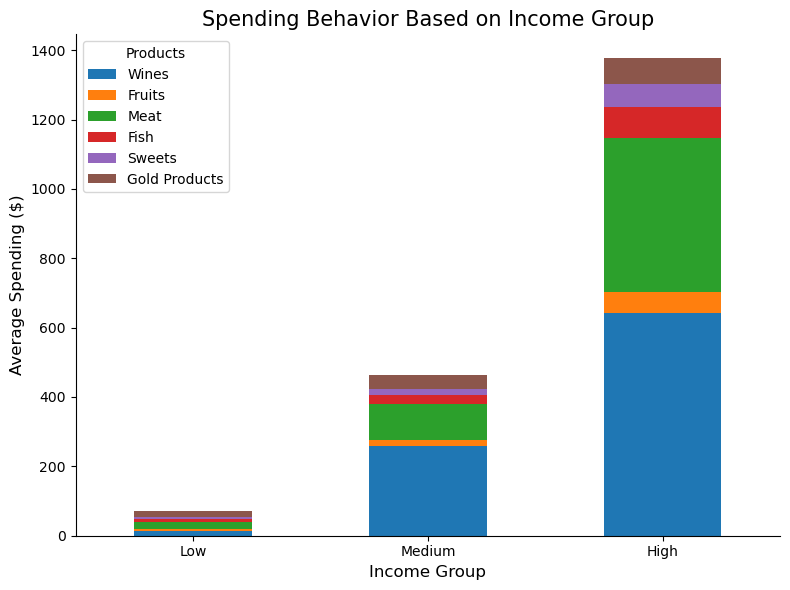

In [3]:
income_group_spend = df.groupby('income_group', observed=True)[['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods']].mean().reset_index()

ax1 = income_group_spend.set_index('income_group').plot(kind='bar', stacked=True, figsize=(8, 6))
new_labels_prod = ["Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold Products"]
ax1.legend(labels=new_labels_prod, title='Products', fontsize=10)
sns.despine()
plt.title('Spending Behavior Based on Income Group', fontsize=15)
plt.xlabel('Income Group', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Average Spending ($)', fontsize=12)
plt.tight_layout()
plt.show()

*Insight #3: Online vs. Offline Purchase Trends*
- 📌 Goal: Compare customers' preferred shopping methods.

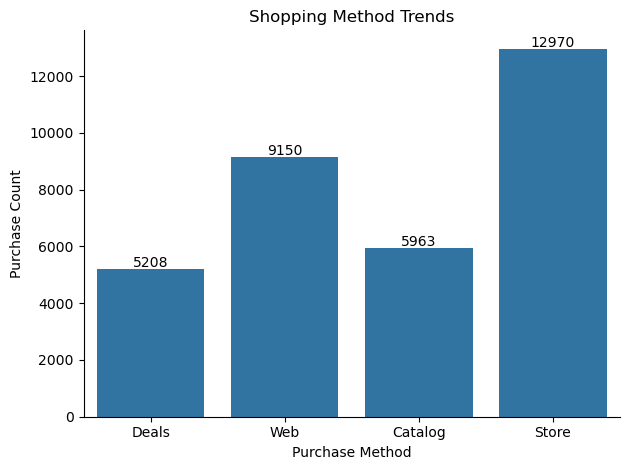

In [4]:
purchases = df[['numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases']].sum()

new_labels_purchase = ['Deals', 'Web', 'Catalog', 'Store']

ax2 = sns.barplot(data=purchases)
for i, v in enumerate(purchases):
    ax2.text(i, v + 65, str(v), ha='center')
ax2.set_xticks(range(len(new_labels_purchase)))
ax2.set_xticklabels(labels=new_labels_purchase )
sns.despine()
plt.xlabel("Purchase Method")
plt.ylabel("Purchase Count")
plt.title("Shopping Method Trends")
plt.tight_layout()
plt.show()

# **Marketing Insights Summary**

### **Top Key Insights**  
- **In-store shopping dominates (12,970 purchases), followed by online (9,150).** The company should focus on enhancing these channels for maximum revenue.  
- **The "Response" campaign had the highest success rate (15%).** Future marketing efforts should replicate its approach.  
- **High-income customers are the biggest spenders, particularly on wines and meat.** Premium offerings and targeted promotions will maximize profitability.  

### **Additional Insights**  
- Campaigns #3, #4, and #5 performed equally (7% success rate), while #2 was the weakest (1%).  
- Medium-income customers show moderate spending; low-income customers contribute the least.  
- Catalog purchases (5,963) and deals-based purchases (5,208) are underperforming, signaling low engagement with these methods.  

### **Strategic Recommendations**  
- **Double down on high-performing campaigns** and analyze what made the "Response" campaign successful.  
- **Optimize in-store and online shopping experiences** since they are the primary revenue drivers.  
- **Develop targeted premium product promotions** for high-income consumers to boost high-margin sales.  
